In [5]:
import wfsim
import matplotlib.pyplot as plt
from multihist import Hist1d, Histdd
import json

In [6]:
with open('/project2/lgrandi/zhut/sim/WFSimDev/fax_config.json') as f:
    c = json.load(f)

In [ ]:
c.update(dict(event_rate=100, chunk_size=1, nchunk=1))
insts = wfsim.rand_instructions(c)

In [ ]:
s1 = wfsim.S1(c)

In [ ]:
inst  = insts[insts['type'] == 's1'][0]
s1(inst)

In [ ]:
s1._photon_timings

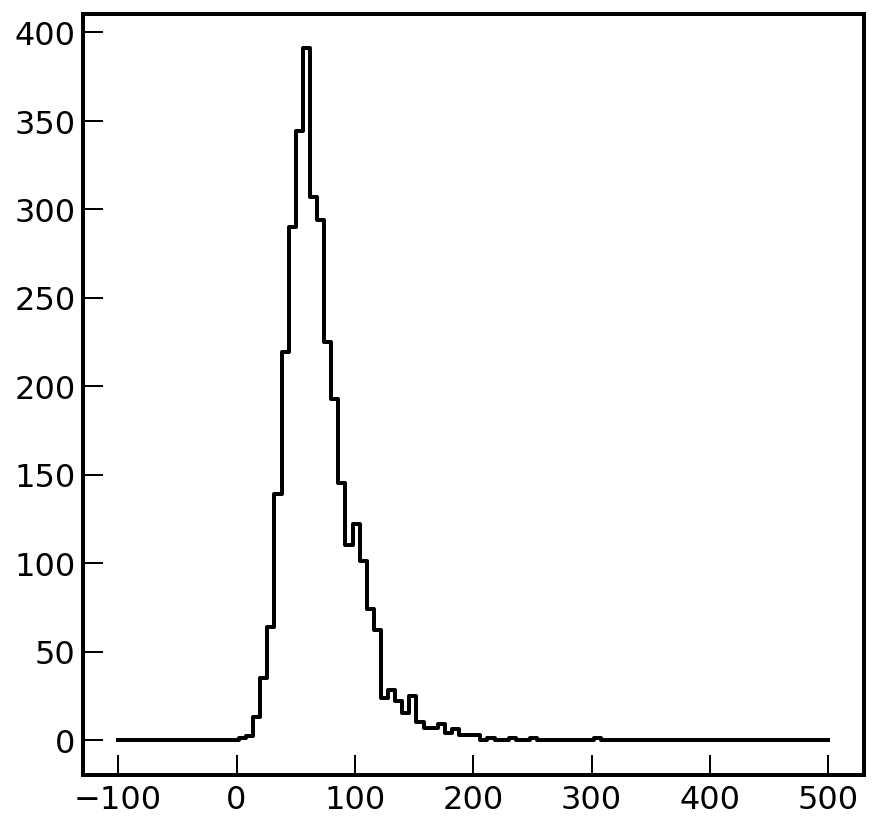

In [90]:
timings = []
for inst in insts[insts['type'] == 's1']:
    s1(inst)
    timings.append(s1._photon_timings - inst[2])
    
timings = np.hstack(timings)
fig = plt.figure(figsize=(7, 7))
ph = Hist1d(timings, range=(-100, 500), bins=100)
ph.plot(color='k')

In [86]:
s1._photon_channels

array([ 90, 158, 147,  63, 209, 120, 107,  89,  99, 246, 143, 114, 205,
       200,  67, 187, 155, 126,  60,  38, 174,  32, 119, 236])

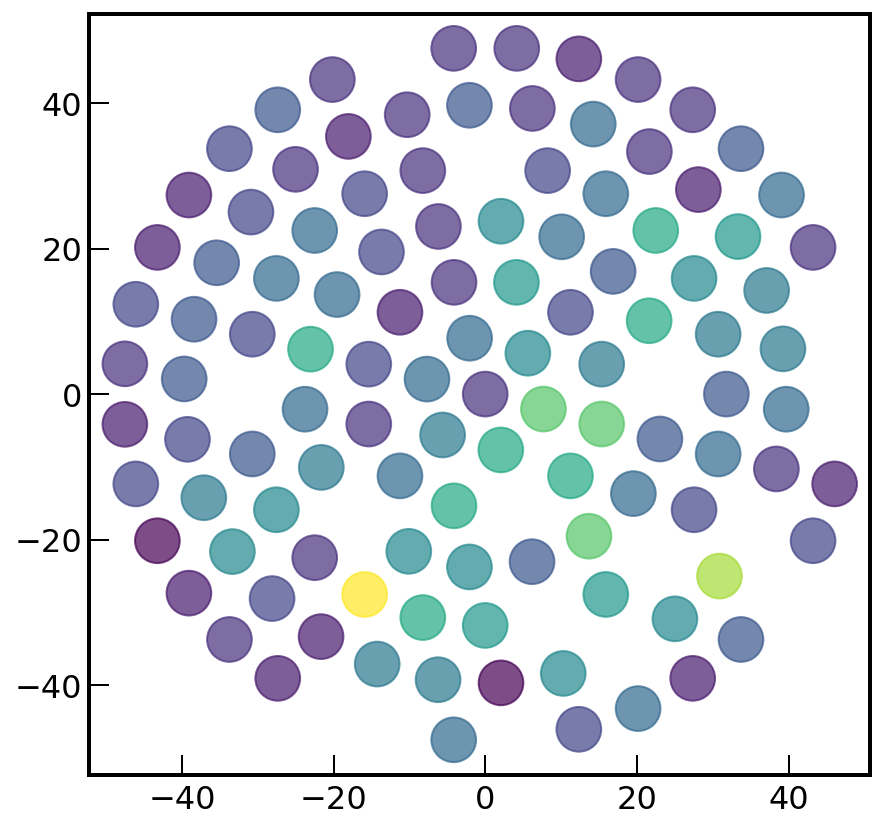

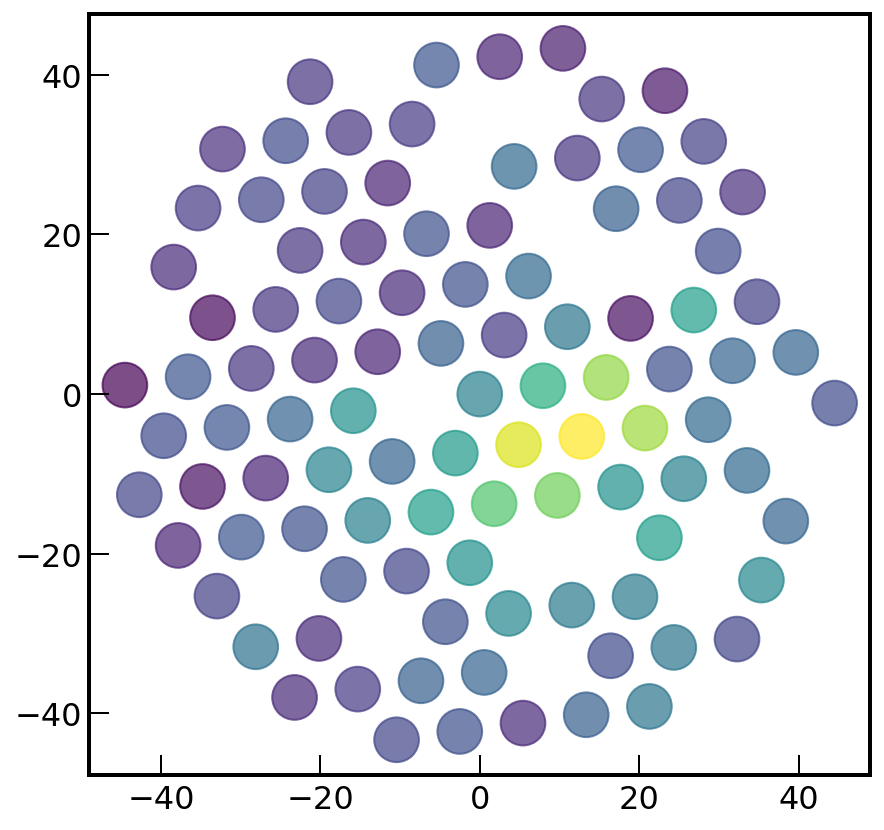

In [89]:

insts = wfsim.rand_instructions(c)
insts['x'] = 10; insts['y'] = -10

channels = []
for inst in insts[insts['type'] == 's1']:
    s1(inst)
    channels.append(s1._photon_channels)
    
channels = np.hstack(channels)
ch, pattern = np.unique(channels, return_counts=True)

fig = plt.figure(figsize=(7, 7))
plt.scatter(pmts['y'][ch[ch<127]], pmts['x'][ch[ch<127]], c=pattern[ch<127], s=500, alpha=0.7)
plt.show()

fig = plt.figure(figsize=(7, 7))
plt.scatter(pmts['y'][ch[ch>=127]], pmts['x'][ch[ch>=127]], c=pattern[ch>=127], s=500, alpha=0.7)
plt.show()